In [575]:
import pandas as pd
import numpy as np
import datetime as dt

In [576]:
def convert_time_string(time_string):
    days, hours, minutes, seconds = map(int, [x.split('-')[0] for x in time_string.split(',')])
    td = pd.Timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    result = '{} days {:02d}:{:02d}:{:02d}'.format(td.components.days, td.components.hours, td.components.minutes, td.components.seconds)
    return result

input_string = '0-Day,00-Hrs,14-Min,19-Sec'
print(convert_time_string(input_string))

0 days 00:14:19


In [577]:
def convert_time_str(time_string):
    
    if time_string== 'Not Applicable':
        return 0
    else:
          days, hours, minutes, seconds = map(int, [str(x).split('-')[0] for x in time_string.split(',')])
          td = pd.Timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
          hours = td / pd.Timedelta(hours=1)
          rounded_hours = round(hours,3)
          return rounded_hours

input_string = 'Not Applicable'
print(convert_time_str(input_string))

0


In [578]:
df=pd.read_excel('/content/TMS_21_22.xlsx')

In [579]:
df.head()

,TMS Number,TMS Scheduled Date,FT Number,Material Description,Quantity,Transporter Name,Vehicle Description,Tanker No,Vehicle In Date,Vehicle In Day,...,Diff 04->05,Diff 05->06,Diff 06->07,Diff 07->08,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory
0,2210304127,2022-01-12,337543.0,POLYMERISED FATTY ACID,30.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 02 XX 5411,2022-01-13,2022-01-13,...,Not Applicable,"0-Day,00-Hrs,17-Min,44-Sec",Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,"0-Day,00-Hrs,17-Min,44-Sec"
1,2210304126,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 9064,2022-01-13,2022-01-13,...,Not Applicable,"0-Day,00-Hrs,20-Min,06-Sec",Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,"0-Day,00-Hrs,20-Min,06-Sec"
2,2210304125,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 5159,2022-01-13,2022-01-13,...,Not Applicable,"0-Day,00-Hrs,22-Min,15-Sec",Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,"0-Day,00-Hrs,22-Min,15-Sec"
3,2210304196,2022-01-15,337632.0,STEARIC ACID UTSR (25 KG BAG),20.0,GoEx Freight Solutions Private Limi,TRUCK,MP 09 HH 2865,2022-01-15,2022-01-15,...,Not Applicable,"0-Day,00-Hrs,03-Min,13-Sec","0-Day,01-Hrs,48-Min,26-Sec",Not Applicable,"0-Day,01-Hrs,07-Min,36-Sec",Not Applicable,Not Applicable,Not Applicable,"0-Day,01-Hrs,51-Min,21-Sec","0-Day,04-Hrs,50-Min,36-Sec"
4,2210304218,2022-01-17,336385.0,VEGAROL EW 100 (25 KG DRUM),1.0,ABHINAV TRANS-CARGO MUMBAI PVT LTD,TRUCK,DN 09 F 9300,2022-01-19,2022-01-19,...,Not Applicable,"0-Day,00-Hrs,26-Min,13-Sec","0-Day,03-Hrs,19-Min,35-Sec",Not Applicable,"0-Day,01-Hrs,03-Min,52-Sec",Not Applicable,Not Applicable,Not Applicable,Not Applicable,"0-Day,04-Hrs,49-Min,40-Sec"


In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217 entries, 0 to 9216
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TMS Number                9217 non-null   int64         
 1   TMS Scheduled Date        9217 non-null   datetime64[ns]
 2   FT Number                 9216 non-null   float64       
 3   Material Description      9216 non-null   object        
 4   Quantity                  9217 non-null   float64       
 5   Transporter Name          9217 non-null   object        
 6   Vehicle Description       9217 non-null   object        
 7   Tanker No                 9217 non-null   object        
 8   Vehicle In Date           9217 non-null   datetime64[ns]
 9   Vehicle In Day            9217 non-null   datetime64[ns]
 10  Vehicle In Time           9217 non-null   object        
 11  First Inspection Remarks  3073 non-null   object        
 12  Net Weight          

##  converted all string data into a Datetime object in Python.

In [582]:
df['Diff 03->04']=df['Diff 03->04'].apply(convert_time_str)
df['Diff 04->05']=df['Diff 04->05'].apply(convert_time_str)
df['Diff 05->06']=df['Diff 05->06'].apply(convert_time_str)
df['Diff 06->07']=df['Diff 06->07'].apply(convert_time_str)
df['Diff 07->08']=df['Diff 07->08'].apply(convert_time_str)
df['Diff 08->09']=df['Diff 08->09'].apply(convert_time_str)
df['Diff 09->10']=df['Diff 09->10'].apply(convert_time_str)
df['Diff 10->11']=df['Diff 10->11'].apply(convert_time_str)
df['Diff 11->12']=df['Diff 11->12'].apply(convert_time_str)
df['Diff 12->13']=df['Diff 12->13'].apply(convert_time_str)
df['Time In Factory']=df['Time In Factory'].apply(convert_time_str)


In [583]:
df.head()

,TMS Number,TMS Scheduled Date,FT Number,Material Description,Quantity,Transporter Name,Vehicle Description,Tanker No,Vehicle In Date,Vehicle In Day,...,Diff 04->05,Diff 05->06,Diff 06->07,Diff 07->08,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory
0,2210304127,2022-01-12,337543.0,POLYMERISED FATTY ACID,30.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 02 XX 5411,2022-01-13,2022-01-13,...,0.0,0.296,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.296
1,2210304126,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 9064,2022-01-13,2022-01-13,...,0.0,0.335,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.335
2,2210304125,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 5159,2022-01-13,2022-01-13,...,0.0,0.371,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.371
3,2210304196,2022-01-15,337632.0,STEARIC ACID UTSR (25 KG BAG),20.0,GoEx Freight Solutions Private Limi,TRUCK,MP 09 HH 2865,2022-01-15,2022-01-15,...,0.0,0.054,1.807,0.0,1.127,0.0,0.0,0.0,1.856,4.843
4,2210304218,2022-01-17,336385.0,VEGAROL EW 100 (25 KG DRUM),1.0,ABHINAV TRANS-CARGO MUMBAI PVT LTD,TRUCK,DN 09 F 9300,2022-01-19,2022-01-19,...,0.0,0.437,3.326,0.0,1.064,0.0,0.0,0.0,0.000,4.828


## Created Day_week columns 

In [586]:
df['Day_week']=df['TMS Scheduled Date'].dt.day_name()

In [587]:
df.head()

,TMS Number,TMS Scheduled Date,FT Number,Material Description,Quantity,Transporter Name,Vehicle Description,Tanker No,Vehicle In Date,Vehicle In Day,...,Diff 05->06,Diff 06->07,Diff 07->08,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week
0,2210304127,2022-01-12,337543.0,POLYMERISED FATTY ACID,30.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 02 XX 5411,2022-01-13,2022-01-13,...,0.296,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.296,Wednesday
1,2210304126,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 9064,2022-01-13,2022-01-13,...,0.335,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.335,Wednesday
2,2210304125,2022-01-12,337543.0,POLYMERISED FATTY ACID,35.0,JAINAM INDUSTRIES PVT LTD,PITCH DESPATCH,GJ 01 JT 5159,2022-01-13,2022-01-13,...,0.371,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.371,Wednesday
3,2210304196,2022-01-15,337632.0,STEARIC ACID UTSR (25 KG BAG),20.0,GoEx Freight Solutions Private Limi,TRUCK,MP 09 HH 2865,2022-01-15,2022-01-15,...,0.054,1.807,0.0,1.127,0.0,0.0,0.0,1.856,4.843,Saturday
4,2210304218,2022-01-17,336385.0,VEGAROL EW 100 (25 KG DRUM),1.0,ABHINAV TRANS-CARGO MUMBAI PVT LTD,TRUCK,DN 09 F 9300,2022-01-19,2022-01-19,...,0.437,3.326,0.0,1.064,0.0,0.0,0.0,0.000,4.828,Monday


Dropped unnecessary Columns 

In [589]:
df.drop(df.columns[[1,5,7,9,11]],axis=1,inplace=True)

## From 'Vehicle In Time' columns extracting the Hours for further Analysis

In [592]:

time_object=pd.to_datetime(df['Vehicle In Time'], format='%H:%M:%S').dt.hour
time_object

0        0
1        0
2        0
3       18
4       13
        ..
9212    17
9213    15
9214    15
9215    14
9216    13
Name: Vehicle In Time, Length: 9217, dtype: int64

## 'Time_Gatein', was created by binning the 'Vehicle In Time' into three categories. The categories are 'Night', which includes vehicles that entered the plant between 12 o'clock midnight to 10 AM, 'Day',which includes vehicles that entered between 10 AM to 4 PM, and 'Evening', which includes vehicles that entered between 6 PM to 12 o'clock midnight. 

In [593]:
bins = [-1,10,16,24]
df['time_gatein']=pd.cut(time_object, bins=bins, labels=['Mid_Night','Day','Evening'])

In [594]:
df.head()

,TMS Number,FT Number,Material Description,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 06->07,Diff 07->08,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein
0,2210304127,337543.0,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.296,Wednesday,Mid_Night
1,2210304126,337543.0,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.335,Wednesday,Mid_Night
2,2210304125,337543.0,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.371,Wednesday,Mid_Night
3,2210304196,337632.0,STEARIC ACID UTSR (25 KG BAG),20.0,TRUCK,2022-01-15,18:50:48,20100.0,0.0,0.0,...,1.807,0.0,1.127,0.0,0.0,0.0,1.856,4.843,Saturday,Evening
4,2210304218,336385.0,VEGAROL EW 100 (25 KG DRUM),1.0,TRUCK,2022-01-19,13:35:37,7360.0,0.0,0.0,...,3.326,0.0,1.064,0.0,0.0,0.0,0.000,4.828,Monday,Day


## Added a new column called 'load_type' to the dataset. This was done by converting the 'Vehicle Description' column into two categories - 'Tanker Load' and 'Packed Load'.

In [595]:
df['Vehicle Description'].unique()


array(['PITCH DESPATCH', 'TRUCK', 'FRESH TANKER', 'ISO CONTAINER',
       "40' FCL CONTAINER", "20' FCL CONTAINER", 'FLEXY CONTAINER'],
      dtype=object)

In [596]:
bins2=['PITCH DESPATCH', 'TRUCK', 'FRESH TANKER', 'ISO CONTAINER',
       "40' FCL CONTAINER", "20' FCL CONTAINER", 'FLEXY CONTAINER']

In [597]:
bins2

['PITCH DESPATCH',
 'TRUCK',
 'FRESH TANKER',
 'ISO CONTAINER',
 "40' FCL CONTAINER",
 "20' FCL CONTAINER",
 'FLEXY CONTAINER']

In [598]:
def binning(i):
    if i== 'PITCH DESPATCH'or i=='FRESH TANKER' or i=='FLEXY CONTAINER' or i=='ISO CONTAINER' :
      return 'Tanker_load'
    else:
      return 'Packed_load'  

In [599]:
df['load_type']=df['Vehicle Description'].apply(binning)

In [600]:
df[['Vehicle In Date']]

,Vehicle In Date
0,2022-01-13
1,2022-01-13
2,2022-01-13
3,2022-01-15
4,2022-01-19
...,...
9212,2021-01-02
9213,2021-01-02
9214,2021-01-02
9215,2021-01-02


In [601]:
df['Vehicle In Date']=pd.to_datetime(df['Vehicle In Date'].dt.date)

In [602]:
df['Vehicle In Date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
9212    2021
9213    2021
9214    2021
9215    2021
9216    2021
Name: Vehicle In Date, Length: 9217, dtype: int64

##  'Per_Hrs_Loading', was created by dividing the 'Net Weight' with the 'Time In Factory' :

In [603]:
df['Net Weight']=np.round(df['Net Weight']/1000,2)


In [604]:
df['per_hrs_loading']=df['Net Weight']/df['Time In Factory']

In [605]:
df.head()

,TMS Number,FT Number,Material Description,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading
0,2210304127,337543.0,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000
1,2210304126,337543.0,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000
2,2210304125,337543.0,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.0,0.0,...,0.000,0.0,0.0,0.0,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000
3,2210304196,337632.0,STEARIC ACID UTSR (25 KG BAG),20.0,TRUCK,2022-01-15,18:50:48,20.10,0.0,0.0,...,1.127,0.0,0.0,0.0,1.856,4.843,Saturday,Evening,Packed_load,4.150320
4,2210304218,336385.0,VEGAROL EW 100 (25 KG DRUM),1.0,TRUCK,2022-01-19,13:35:37,7.36,0.0,0.0,...,1.064,0.0,0.0,0.0,0.000,4.828,Monday,Day,Packed_load,1.524441


In [606]:
# df.to_excel('modified_TMS2.xlsx', index=False)

In [607]:
df.isnull().sum()

TMS Number              0
FT Number               1
Material Description    1
Quantity                0
Vehicle Description     0
Vehicle In Date         0
Vehicle In Time         0
Net Weight              0
Diff 03->04             0
Diff 04->05             0
Diff 05->06             0
Diff 06->07             0
Diff 07->08             0
Diff 08->09             0
Diff 09->10             0
Diff 10->11             0
Diff 11->12             0
Diff 12->13             0
Time In Factory         0
Day_week                0
time_gatein             0
load_type               0
per_hrs_loading         0
dtype: int64

In [608]:
df=df.dropna()

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns

In [610]:
df["load_type"].unique()

array(['Tanker_load', 'Packed_load'], dtype=object)

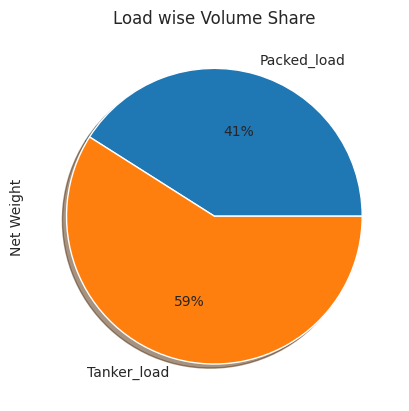

In [611]:
df.groupby('load_type')['Net Weight'].sum().plot(
    kind='pie', y=df["load_type"], autopct='%1.0f%%',shadow=True)
plt.title('Load wise Volume Share') 
plt.show() 

load_type        Packed_load  Tanker_load
Vehicle In Date                          
2021                8.218143    16.680606
2022                7.199261    20.045441


<Figure size 1600x800 with 0 Axes>

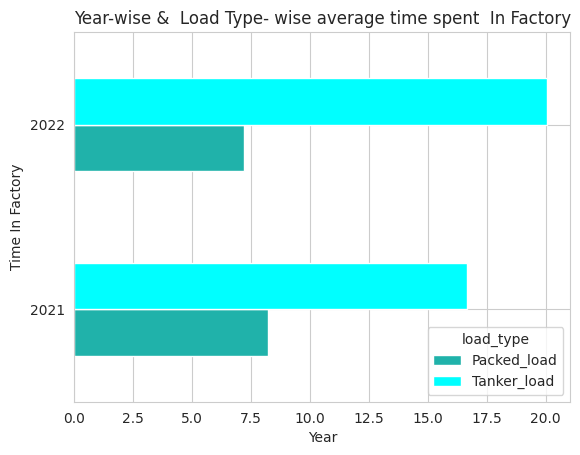

In [612]:
plt.figure(figsize=(16,8))
year=(df['Vehicle In Date'].dt.year)
pivot_df=df.pivot_table(index=year , columns="load_type", values="Time In Factory")
print(pivot_df)
pivot_df.plot(kind="barh",legend=True,color=["lightseagreen", "aqua"])

plt.xlabel('Year')
plt.ylabel('Time In Factory')
plt.title('Year-wise &  Load Type- wise average time spent  In Factory')

plt.show()

load_type        Packed_load  Tanker_load
Vehicle In Date                          
2021                1.693762     1.700049
2022                1.594646     1.367735


<Figure size 1600x1600 with 0 Axes>

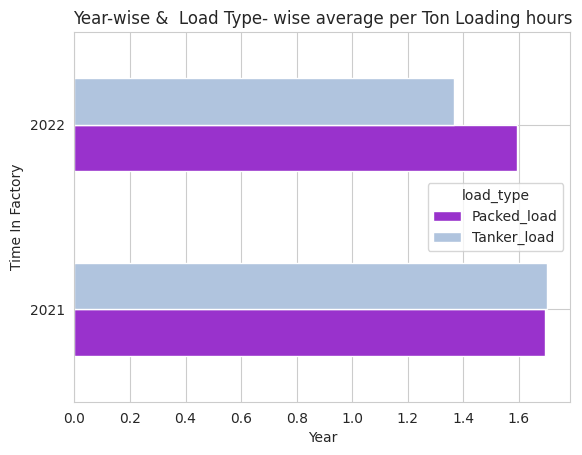

In [613]:

year=(df['Vehicle In Date'].dt.year)
pivot_df=df.pivot_table(index=year , columns="load_type", values="per_hrs_loading")
print(pivot_df)

plt.figure(figsize=(16,16))
pivot_df.plot(kind="barh",legend=True,color=["darkorchid", "lightsteelblue"])

plt.xlabel('Year')
plt.ylabel('Time In Factory')
plt.title('Year-wise &  Load Type- wise average per Ton Loading hours')

plt.show()

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 0 to 9216
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TMS Number            9216 non-null   int64         
 1   FT Number             9216 non-null   float64       
 2   Material Description  9216 non-null   object        
 3   Quantity              9216 non-null   float64       
 4   Vehicle Description   9216 non-null   object        
 5   Vehicle In Date       9216 non-null   datetime64[ns]
 6   Vehicle In Time       9216 non-null   object        
 7   Net Weight            9216 non-null   float64       
 8   Diff 03->04           9216 non-null   float64       
 9   Diff 04->05           9216 non-null   float64       
 10  Diff 05->06           9216 non-null   float64       
 11  Diff 06->07           9216 non-null   float64       
 12  Diff 07->08           9216 non-null   float64       
 13  Diff 08->09       

In [615]:
!pip install squarify -qqq

In [616]:
squarify.plot

<function squarify.plot(sizes, norm_x=100, norm_y=100, color=None, label=None, value=None, ax=None, pad=False, bar_kwargs=None, text_kwargs=None, **kwargs)>

In [617]:
df_bulk=df[df["load_type"]=="Tanker_load"]

In [618]:
df_bulk.head()

,TMS Number,FT Number,Material Description,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading
0,2210304127,3.375430e+05,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.000,0.000,...,0.000,0.000,0.0,0.000,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000
1,2210304126,3.375430e+05,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.000,0.000,...,0.000,0.000,0.0,0.000,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000
2,2210304125,3.375430e+05,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.000,0.000,...,0.000,0.000,0.0,0.000,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000
8,2210304316,3.400012e+09,DIST FATTY ACID C1218 - W,34000.0,FRESH TANKER,2022-01-23,10:55:23,32.51,0.877,2.345,...,0.036,0.138,0.0,1.076,8.727,22.414,Saturday,Mid_Night,Tanker_load,1.450433
9,2210304373,3.379840e+05,VEGAROL C1214 (MB),22.0,FRESH TANKER,2022-01-27,19:09:23,0.00,0.126,0.211,...,0.191,0.337,0.0,0.265,0.066,7.002,Tuesday,Evening,Tanker_load,0.000000


In [619]:
df_vlook=pd.read_excel("/content/vloopup_data.xlsx")
df_vlook.head()

,Material Description,product Name
0,BOTTOM PRODUCT PKO (MB),Others
1,CAPRYLIC ACID 99%,Others
2,CAPRYLIC CAPRIC ACID,Others
3,DIST FATTY ACID C1214,Others
4,DIST FATTY ACID C1218 - AL,Others


In [620]:
merged_df = pd.merge(df_bulk,df_vlook , on='Material Description')
merged_df

,TMS Number,FT Number,Material Description,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading,product Name
0,2210304127,3.375430e+05,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.000,0.000,...,0.000,0.0,0.000,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000,Others
1,2210304126,3.375430e+05,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.000,0.000,...,0.000,0.0,0.000,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000,Others
2,2210304125,3.375430e+05,POLYMERISED FATTY ACID,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.000,0.000,...,0.000,0.0,0.000,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000,Others
3,2210305402,3.409720e+05,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-03-22,04:44:49,30.14,0.000,0.000,...,0.122,0.0,0.000,3.769,11.116,Monday,Mid_Night,Tanker_load,2.711407,Others
4,2210305401,3.409720e+05,POLYMERISED FATTY ACID,30.0,PITCH DESPATCH,2022-03-22,04:37:07,29.70,0.000,0.000,...,0.061,0.0,0.000,2.335,11.279,Monday,Mid_Night,Tanker_load,2.633212,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,2110305252,3.400011e+09,BOTTOM PRODUCT PKO (MB),30000.0,FRESH TANKER,2021-02-18,14:06:36,0.00,0.624,1.173,...,0.000,0.0,0.000,0.000,2.399,Tuesday,Day,Tanker_load,0.000000,Others
3411,2110305240,3.400011e+09,BOTTOM PRODUCT PKO (MB),30000.0,FRESH TANKER,2021-02-16,17:04:27,0.00,0.356,0.060,...,0.000,0.0,0.000,0.000,1.049,Tuesday,Evening,Tanker_load,0.000000,Others
3412,2210300446,3.400011e+09,DISTILLED FATTY ACID C1618 (MB),40000.0,FRESH TANKER,2021-05-05,16:32:35,36.17,1.966,0.463,...,0.046,0.0,6.352,1.673,20.738,Wednesday,Day,Tanker_load,1.744141,Others
3413,2210300036,3.400011e+09,DISTILLED FATTY ACID C1618 (MB),38000.0,FRESH TANKER,2021-04-05,16:38:23,35.87,1.051,1.304,...,0.242,0.0,0.929,3.617,28.761,Monday,Day,Tanker_load,1.247175,Others


In [621]:
merged_df.columns

Index(['TMS Number', 'FT Number', 'Material Description', 'Quantity',
       'Vehicle Description', 'Vehicle In Date', 'Vehicle In Time',
       'Net Weight', 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13', 'Time In Factory',
       'Day_week', 'time_gatein', 'load_type', 'per_hrs_loading',
       'product Name'],
      dtype='object')

In [622]:
df_bulk=merged_df[['TMS Number', 'FT Number', 'product Name', 'Quantity',
       'Vehicle Description', 'Vehicle In Date', 'Vehicle In Time',
       'Net Weight', 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13', 'Time In Factory',
       'Day_week', 'time_gatein', 'load_type', 'per_hrs_loading'
       ]]
df_bulk.head()       

,TMS Number,FT Number,product Name,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading
0,2210304127,337543.0,Others,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000
1,2210304126,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000
2,2210304125,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000
3,2210305402,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:44:49,30.14,0.0,0.0,...,1.533,0.122,0.0,0.0,3.769,11.116,Monday,Mid_Night,Tanker_load,2.711407
4,2210305401,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:37:07,29.70,0.0,0.0,...,2.127,0.061,0.0,0.0,2.335,11.279,Monday,Mid_Night,Tanker_load,2.633212


In [623]:
df_bulk=merged_df[['TMS Number', 'FT Number', 'product Name', 'Quantity',
       'Vehicle Description', 'Vehicle In Date', 'Vehicle In Time',
       'Net Weight', 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13', 'Time In Factory',
       'Day_week', 'time_gatein', 'load_type', 'per_hrs_loading'
       ]]
df_bulk.head()       

,TMS Number,FT Number,product Name,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading
0,2210304127,337543.0,Others,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000
1,2210304126,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000
2,2210304125,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000
3,2210305402,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:44:49,30.14,0.0,0.0,...,1.533,0.122,0.0,0.0,3.769,11.116,Monday,Mid_Night,Tanker_load,2.711407
4,2210305401,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:37:07,29.70,0.0,0.0,...,2.127,0.061,0.0,0.0,2.335,11.279,Monday,Mid_Night,Tanker_load,2.633212


In [624]:
df_bulk=merged_df[['TMS Number', 'FT Number', 'product Name', 'Quantity',
       'Vehicle Description', 'Vehicle In Date', 'Vehicle In Time',
       'Net Weight', 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13', 'Time In Factory',
       'Day_week', 'time_gatein', 'load_type', 'per_hrs_loading'
       ]]
df_bulk.head()       

,TMS Number,FT Number,product Name,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading
0,2210304127,337543.0,Others,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.296,Wednesday,Mid_Night,Tanker_load,0.000000
1,2210304126,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.335,Wednesday,Mid_Night,Tanker_load,0.000000
2,2210304125,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:02:35,0.00,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.371,Wednesday,Mid_Night,Tanker_load,0.000000
3,2210305402,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:44:49,30.14,0.0,0.0,...,1.533,0.122,0.0,0.0,3.769,11.116,Monday,Mid_Night,Tanker_load,2.711407
4,2210305401,340972.0,Others,30.0,PITCH DESPATCH,2022-03-22,04:37:07,29.70,0.0,0.0,...,2.127,0.061,0.0,0.0,2.335,11.279,Monday,Mid_Night,Tanker_load,2.633212


In [625]:
!pip install squarify -qqq

In [626]:
df_bulk["product Name"].unique()

array(['Others', 'Alcohol 12-18', 'TAM', 'Erucic Acid', 'Vegacid 1880',
       'Glycerin', 'Superflex'], dtype=object)

In [627]:
df_bulk.groupby("product Name")["Net Weight"].sum()

product Name
Alcohol 12-18    24523.01
Erucic Acid       9075.28
Glycerin          4556.85
Others           25674.09
Superflex         1979.94
TAM                314.23
Vegacid 1880     10611.59
Name: Net Weight, dtype: float64

In [628]:
df_bulk.groupby("product Name")["Time In Factory"].sum()

product Name
Alcohol 12-18    18973.989
Erucic Acid       8313.133
Glycerin          6078.255
Others           17832.474
Superflex         1425.650
TAM                687.311
Vegacid 1880      9550.755
Name: Time In Factory, dtype: float64

In [629]:
df_bulk.groupby("product Name")["Time In Factory"].mean()

product Name
Alcohol 12-18    16.161830
Erucic Acid      19.983493
Glycerin         23.650798
Others           18.614273
Superflex        17.176506
TAM              28.637958
Vegacid 1880     18.987584
Name: Time In Factory, dtype: float64

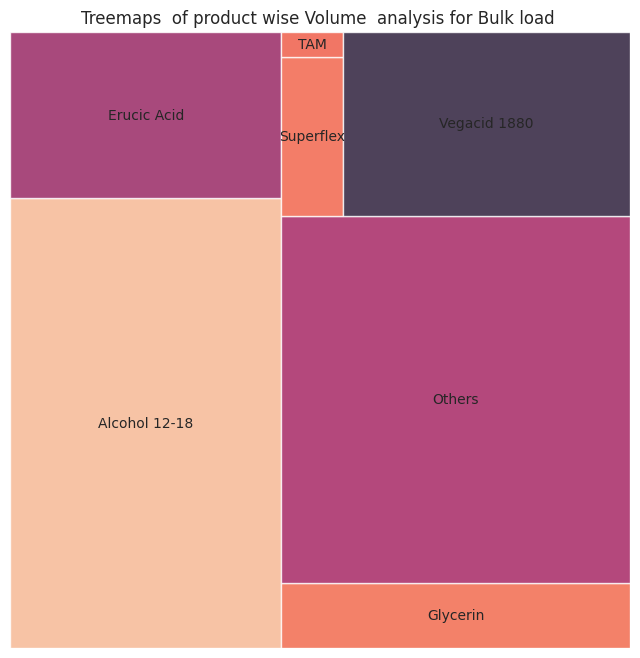

In [630]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

plt.figure(figsize=(8, 8))

# plot treemap
squarify.plot(sizes = df_bulk.groupby("product Name")["Net Weight"].sum(), label=(df_bulk.groupby("product Name")["Net Weight"].sum()).index , alpha=0.8)

# set title and axis off
plt.title('Treemaps  of product wise Volume  analysis for Bulk load ')
plt.axis('off')

# display plot
plt.show()

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 0 to 9216
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TMS Number            9216 non-null   int64         
 1   FT Number             9216 non-null   float64       
 2   Material Description  9216 non-null   object        
 3   Quantity              9216 non-null   float64       
 4   Vehicle Description   9216 non-null   object        
 5   Vehicle In Date       9216 non-null   datetime64[ns]
 6   Vehicle In Time       9216 non-null   object        
 7   Net Weight            9216 non-null   float64       
 8   Diff 03->04           9216 non-null   float64       
 9   Diff 04->05           9216 non-null   float64       
 10  Diff 05->06           9216 non-null   float64       
 11  Diff 06->07           9216 non-null   float64       
 12  Diff 07->08           9216 non-null   float64       
 13  Diff 08->09       

In [632]:
df["year"]=df["Vehicle In Date"].dt.year

In [633]:
df.groupby("year")[["Net Weight","Time In Factory"]].sum()


,Net Weight,Time In Factory
year,,
2021,63958.05,50030.873
2022,66265.45,57343.303


      Net Weight  Time In Factory
year                             
2021    63958.05        50030.873
2022    66265.45        57343.303


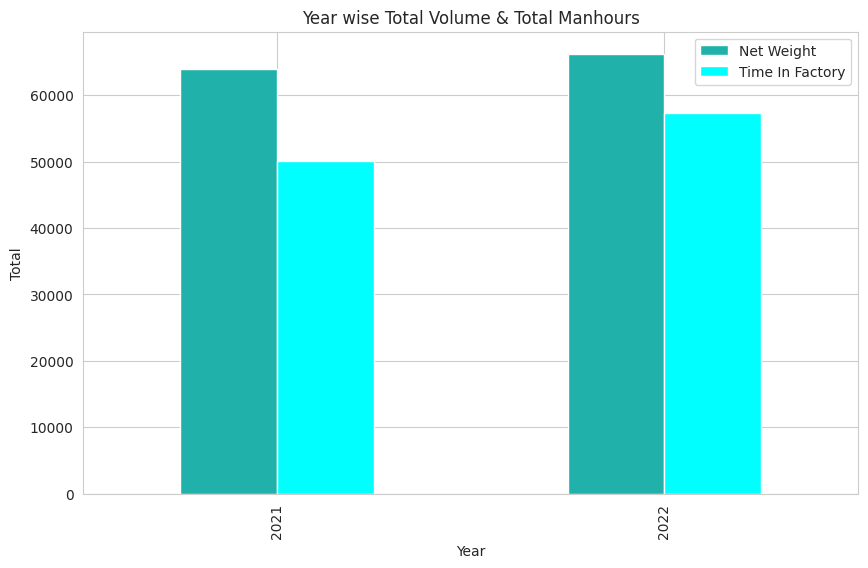

In [634]:
yearly_data = df.groupby("year")[["Net Weight","Time In Factory"]].sum()

print(yearly_data)
ax = yearly_data.plot(kind="bar", figsize=(10,6),color=["lightseagreen", "aqua"])


ax.set_title("Year wise Total Volume & Total Manhours")
ax.set_xlabel("Year")
ax.set_ylabel("Total")


plt.show()

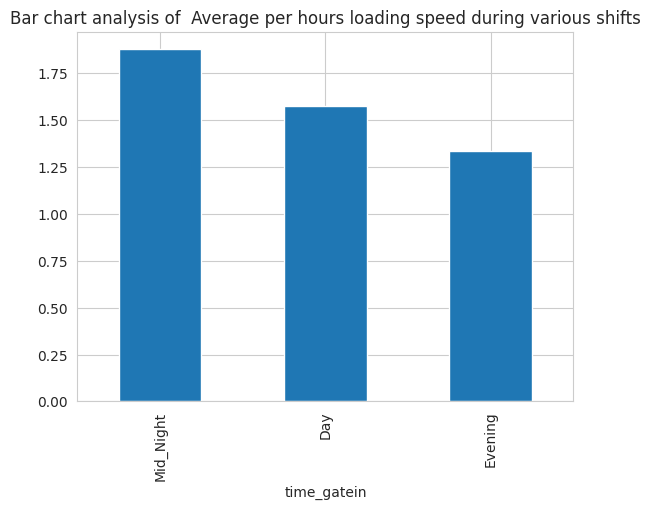

In [635]:
df_bulk.groupby("time_gatein")["per_hrs_loading"].mean().plot(kind='bar')

plt.title('Bar chart analysis of  Average per hours loading speed during various shifts')
plt.show()

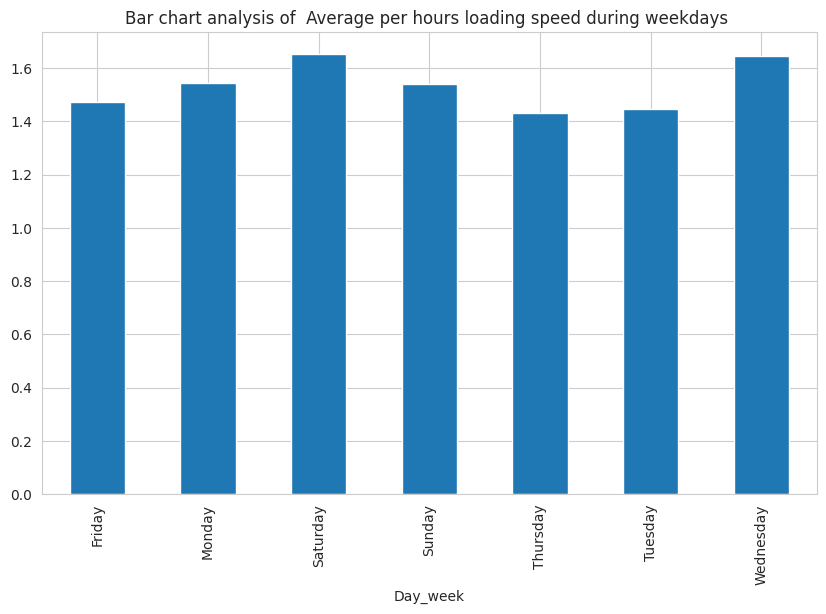

In [636]:
df_bulk.groupby('Day_week')["per_hrs_loading"].mean().plot(kind='bar',figsize=(10,6))

plt.title('Bar chart analysis of  Average per hours loading speed during weekdays ')
plt.show()

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 0 to 9216
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TMS Number            9216 non-null   int64         
 1   FT Number             9216 non-null   float64       
 2   Material Description  9216 non-null   object        
 3   Quantity              9216 non-null   float64       
 4   Vehicle Description   9216 non-null   object        
 5   Vehicle In Date       9216 non-null   datetime64[ns]
 6   Vehicle In Time       9216 non-null   object        
 7   Net Weight            9216 non-null   float64       
 8   Diff 03->04           9216 non-null   float64       
 9   Diff 04->05           9216 non-null   float64       
 10  Diff 05->06           9216 non-null   float64       
 11  Diff 06->07           9216 non-null   float64       
 12  Diff 07->08           9216 non-null   float64       
 13  Diff 08->09       

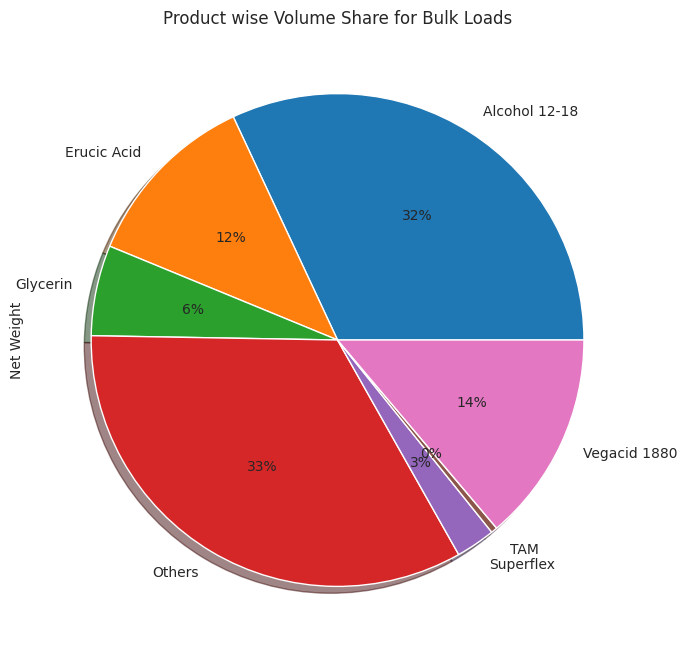

In [638]:
df_bulk.groupby("product Name")["Net Weight"].sum().plot(kind="pie",figsize=(10,8),autopct='%1.0f%%',shadow=True)
plt.title('Product wise Volume Share for Bulk Loads') 
plt.show() 

In [639]:
df_bulk.groupby(df_bulk['Vehicle In Date'].dt.year)["Time In Factory"].mean()

Vehicle In Date
2021    16.686566
2022    20.062180
Name: Time In Factory, dtype: float64

In [640]:
df_bulk["year"]=df_bulk["Vehicle In Date"].dt.year
df_bulk.head(2)

,TMS Number,FT Number,product Name,Quantity,Vehicle Description,Vehicle In Date,Vehicle In Time,Net Weight,Diff 03->04,Diff 04->05,...,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13,Time In Factory,Day_week,time_gatein,load_type,per_hrs_loading,year
0,2210304127,337543.0,Others,30.0,PITCH DESPATCH,2022-01-13,00:15:43,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.296,Wednesday,Mid_Night,Tanker_load,0.0,2022
1,2210304126,337543.0,Others,35.0,PITCH DESPATCH,2022-01-13,00:08:37,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.335,Wednesday,Mid_Night,Tanker_load,0.0,2022


In [641]:
df_bulk.pivot_table(index=year,columns="product Name",values="Time In Factory" )

product Name,Alcohol 12-18,Erucic Acid,Glycerin,Others,Superflex,TAM,Vegacid 1880
Vehicle In Date,,,,,,,
2021,NaN,NaN,NaN,22.710000,NaN,NaN,NaN
2022,16.16183,19.983493,23.650798,18.605705,17.176506,28.637958,18.987584


load_type        Packed_load  Tanker_load
Vehicle In Date                          
2021                8.218143    16.680606
2022                7.199261    20.045441


<Figure size 1600x800 with 0 Axes>

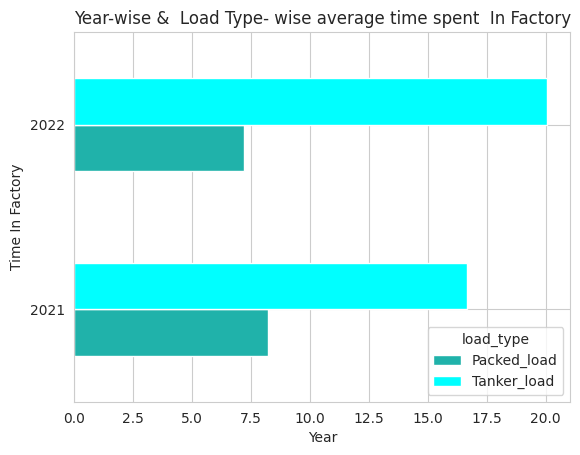

In [642]:
plt.figure(figsize=(16,8))
year=(df['Vehicle In Date'].dt.year)
pivot_df=df.pivot_table(index=year , columns="load_type", values="Time In Factory")
print(pivot_df)
pivot_df.plot(kind="barh",legend=True,color=["lightseagreen", "aqua"])

plt.xlabel('Year')
plt.ylabel('Time In Factory')
plt.title('Year-wise &  Load Type- wise average time spent  In Factory')

plt.show()

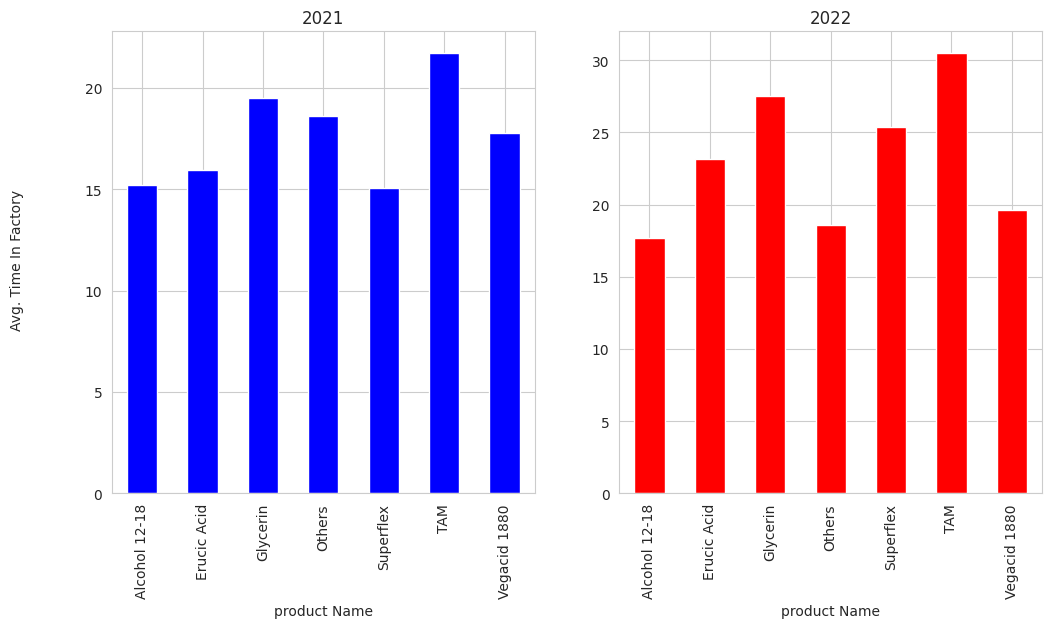

In [643]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


df_bulk[df_bulk["year"]==2021].groupby("product Name")["Time In Factory"].mean().plot(kind="bar", ax=ax1,color="b")
ax1.set_title("2021")


df_bulk[df_bulk["year"]==2022].groupby("product Name")["Time In Factory"].mean().plot(kind="bar", ax=ax2,color="r")
ax2.set_title("2022")


fig.text(0.04, 0.5, 'Avg. Time In Factory', va='center', rotation='vertical')

plt.show()

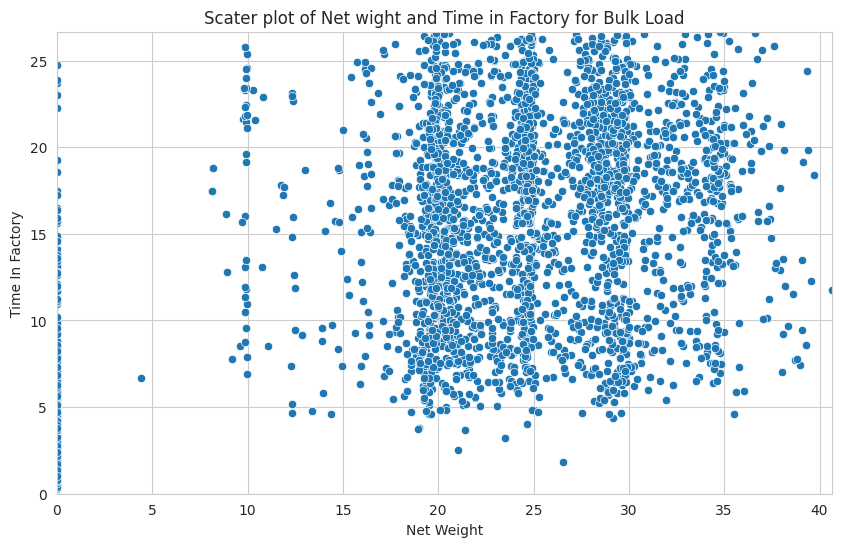

In [644]:
filtered_data = df_bulk[df_bulk['Time In Factory'] < df_bulk['Time In Factory'].quantile(0.90)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Net Weight', y='Time In Factory', data=filtered_data)
plt.xlim(0, filtered_data['Net Weight'].max())
plt.ylim(0, filtered_data['Time In Factory'].max())
plt.title("Scater plot of Net wight and Time in Factory for Bulk Load")
plt.show()

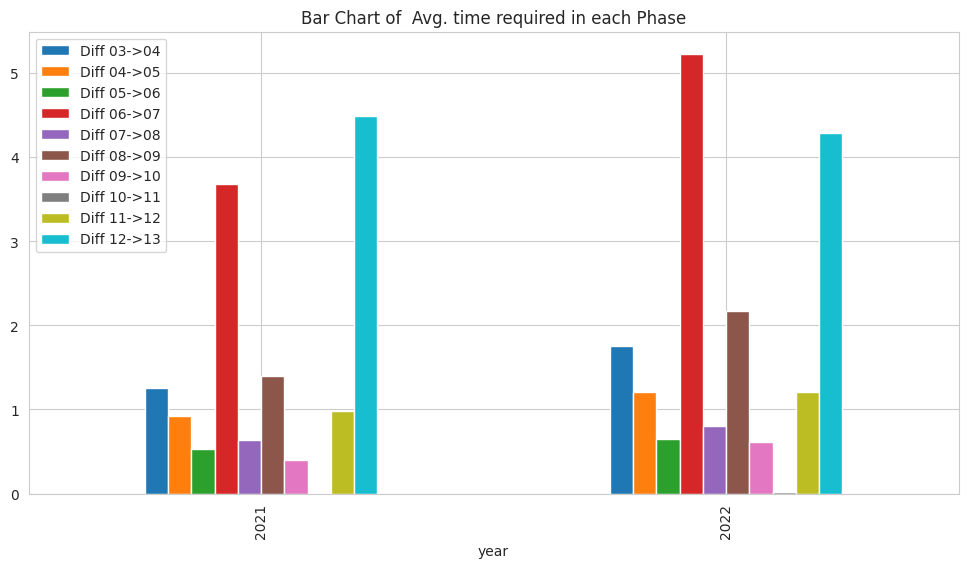

In [645]:
df_bulk.groupby("year")[[ 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13']].mean().plot(kind='bar', figsize=(12,6))
plt.title("Bar Chart of  Avg. time required in each Phase") 

plt.show()

In [646]:
df_bulk.groupby("year")[['Vehicle In Date', 'Vehicle In Time',
       'Net Weight', 'Diff 03->04', 'Diff 04->05', 'Diff 05->06',
       'Diff 06->07', 'Diff 07->08', 'Diff 08->09', 'Diff 09->10',
       'Diff 10->11', 'Diff 11->12', 'Diff 12->13']].mean()

<ipython-input-646-bf03e61a29c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'Diff 10->11', 'Diff 11->12', 'Diff 12->13']].mean()


,Net Weight,Diff 03->04,Diff 04->05,Diff 05->06,Diff 06->07,Diff 07->08,Diff 08->09,Diff 09->10,Diff 10->11,Diff 11->12,Diff 12->13
year,,,,,,,,,,,
2021,22.642730,1.250589,0.917773,0.527218,3.686373,0.633537,1.394904,0.394663,0.004908,0.981388,4.490200
2022,22.303883,1.758725,1.206199,0.643857,5.231355,0.800207,2.166267,0.616980,0.014990,1.210341,4.288528


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 0 to 9216
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TMS Number            9216 non-null   int64         
 1   FT Number             9216 non-null   float64       
 2   Material Description  9216 non-null   object        
 3   Quantity              9216 non-null   float64       
 4   Vehicle Description   9216 non-null   object        
 5   Vehicle In Date       9216 non-null   datetime64[ns]
 6   Vehicle In Time       9216 non-null   object        
 7   Net Weight            9216 non-null   float64       
 8   Diff 03->04           9216 non-null   float64       
 9   Diff 04->05           9216 non-null   float64       
 10  Diff 05->06           9216 non-null   float64       
 11  Diff 06->07           9216 non-null   float64       
 12  Diff 07->08           9216 non-null   float64       
 13  Diff 08->09       

## Year wise data of Total No of Vehicle (Tanker) spent more than 16 hrs. time in Plant and Overall detention changes paid to the Transporters (Rs. 3000/- detention charge of per vehicle) 

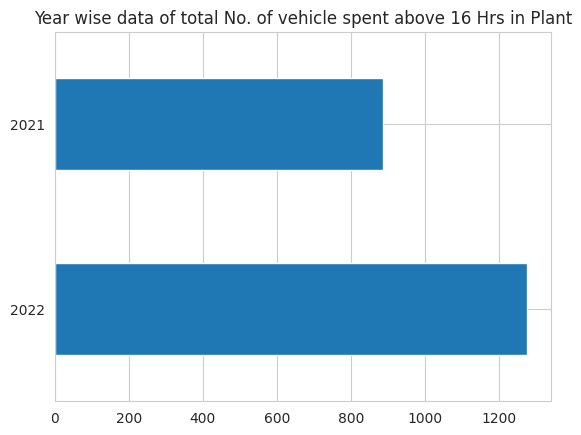

2022    1277
2021     888
Name: year, dtype: int64


In [648]:
df[df["Time In Factory"]>=16]["year"].value_counts().plot(kind="barh")
plt.title("Year wise data of total No. of vehicle spent above 16 Hrs in Plant")
plt.show()
print(df[df["Time In Factory"]>=16]["year"].value_counts())

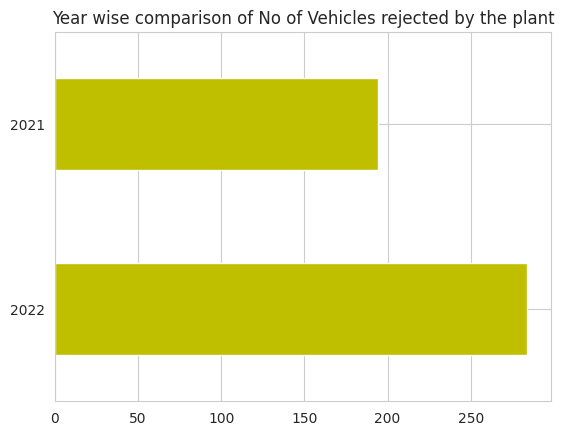

2022    284
2021    194
Name: year, dtype: int64


In [650]:
df[df['Net Weight']==0]["year"].value_counts().plot(kind="barh",color='y')
plt.title("Year wise comparison of No of Vehicles rejected by the plant")
plt.show()
print(df[df['Net Weight']==0]["year"].value_counts())